TODO:
- Testing to verify that head angle at trial start is correct (Then all head angle to wall code is verified correct)
- Including the other wall and angle to it in these test plots, to see exactly which trials have both walls initially visible

In [1]:
%load_ext autoreload
%autoreload 2
import data_extraction.get_indices as get_indices
import parse_data.prepare_data as prepare_data
import globals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from plotting import plot_octagon, plot_trajectory
import data_extraction.get_indices as get_indices
import plotting.plot_probability_chose_wall as plot_probability_chose_wall
import data_strings
import analysis.wall_visibility_and_choice as wall_visibility_and_choice
import trajectory_analysis.trajectory_vectors as trajectory_vectors
import trajectory_analysis.trajectory_headangle as trajectory_headangle
import analysis.wall_choice as wall_choice
import data_extraction.extract_trial as extract_trial
import utils.pad_and_reshape_array as utils
import plotting.wall_visibility_order_testing_functions as wall_visibility_order_testing_functions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# notebook global variables

wall_sep = None
trial_type = globals.HIGH_LOW
player_id = 0
n_cols = 12

In [3]:
# prepare the data

data_folder = data_strings.DATA_FOLDER
json_filenames_all_social = data_strings.JSON_FILENAMES_SOCIAL
json_filenames_all_solo = data_strings.JSON_FILENAMES_SOLO

# specify session number
json_filename = json_filenames_all_social[3]

_, trial_list = prepare_data.prepare_data(data_folder, json_filename, combine=True)

filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\fourth_experiments_2410\241017\2024-10-17_16-41-38_ZimoElsaSocial.json
Loading complete.
Preprocessing complete.


In [5]:
# filter the trial list for trialtype and wallsep

# filter trial list for HighLow trialtype
trial_indices = get_indices.get_trials_trialtype(trial_list, trial_type=trial_type)
trial_list_filtered = [trial_list[i] for i in trial_indices]

# filter trial list for wall separations if specified
if wall_sep:
    trial_indices = get_indices.get_trials_with_wall_sep(trial_list_filtered, wall_sep=wall_sep)
    trial_list_filtered = [trial_list_filtered[i] for i in trial_indices]


In [6]:
# gather data for the first visible wall for the session

# condition here is 'first wall visible is High, High is chosen', no inferred choice
(condition_fulfilled_session,
  player_chose_given_wall_session) = wall_visibility_and_choice.given_wall_chosen_conditioned_on_visibility(trial_list, player_id=player_id,
                                                                                                            given_wall_index=0, given_wall_first_vis=True,
                                                                                                              current_fov=110, wall_sep=None, trial_type=globals.HIGH_LOW,
                                                                                                                inferred_choice=False, debug=False)


player_wall_choice = wall_choice.player_wall_choice_wins_only(trial_list_filtered, player_id=player_id)


 player wall choice this trial: nan
not confident in loser's choice, or inferred choice not used
 first_vis_wall_chosen: nan
 this_player_this_trial_first_visible_wall_chosen: nan
for trial 0, trial_player_chose_given_wall added to array as nan
 player wall choice this trial: 1.0
 this_player_this_trial_first_visible_wall_chosen: True
for trial 1, trial_player_chose_given_wall added to array as True
 player wall choice this trial: nan
not confident in loser's choice, or inferred choice not used
 first_vis_wall_chosen: nan
 this_player_this_trial_first_visible_wall_chosen: nan
for trial 2, trial_player_chose_given_wall added to array as nan
 player wall choice this trial: 3.0
 this_player_this_trial_first_visible_wall_chosen: True
for trial 3, trial_player_chose_given_wall added to array as True
 player wall choice this trial: 2.0
 this_player_this_trial_first_visible_wall_chosen: True
for trial 4, trial_player_chose_given_wall added to array as True
 player wall choice this trial: nan


In [7]:
# reshape relevant arrays to fit with n_rows,n_cols grid (pad with np.nan) 

condition_fulfilled_session_reshaped = utils.pad_and_reshape_array(condition_fulfilled_session, n_cols)
player_chose_given_wall_session_reshaped = utils.pad_and_reshape_array(player_chose_given_wall_session, n_cols)
player_wall_choice_reshaped = utils.pad_and_reshape_array(player_wall_choice, n_cols)


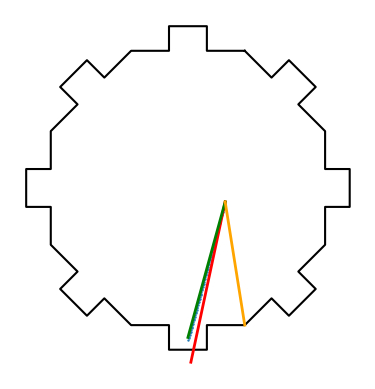

Angle to closest wall section and alcove: 21.1, 3.3


In [46]:
(thetas_closest_wall_section,
 thetas_trajectory)  = wall_visibility_order_testing_functions.plot_single_trial_first_wall_visibility(trial_list_filtered, trial_num=97,
                                                                vector_length=20, start_index=0, wall_index=None, player_id=0)

print(f"Angle to closest wall section and alcove: {thetas_closest_wall_section}, {thetas_trajectory}")

Exception: list index out of range, no trials left?


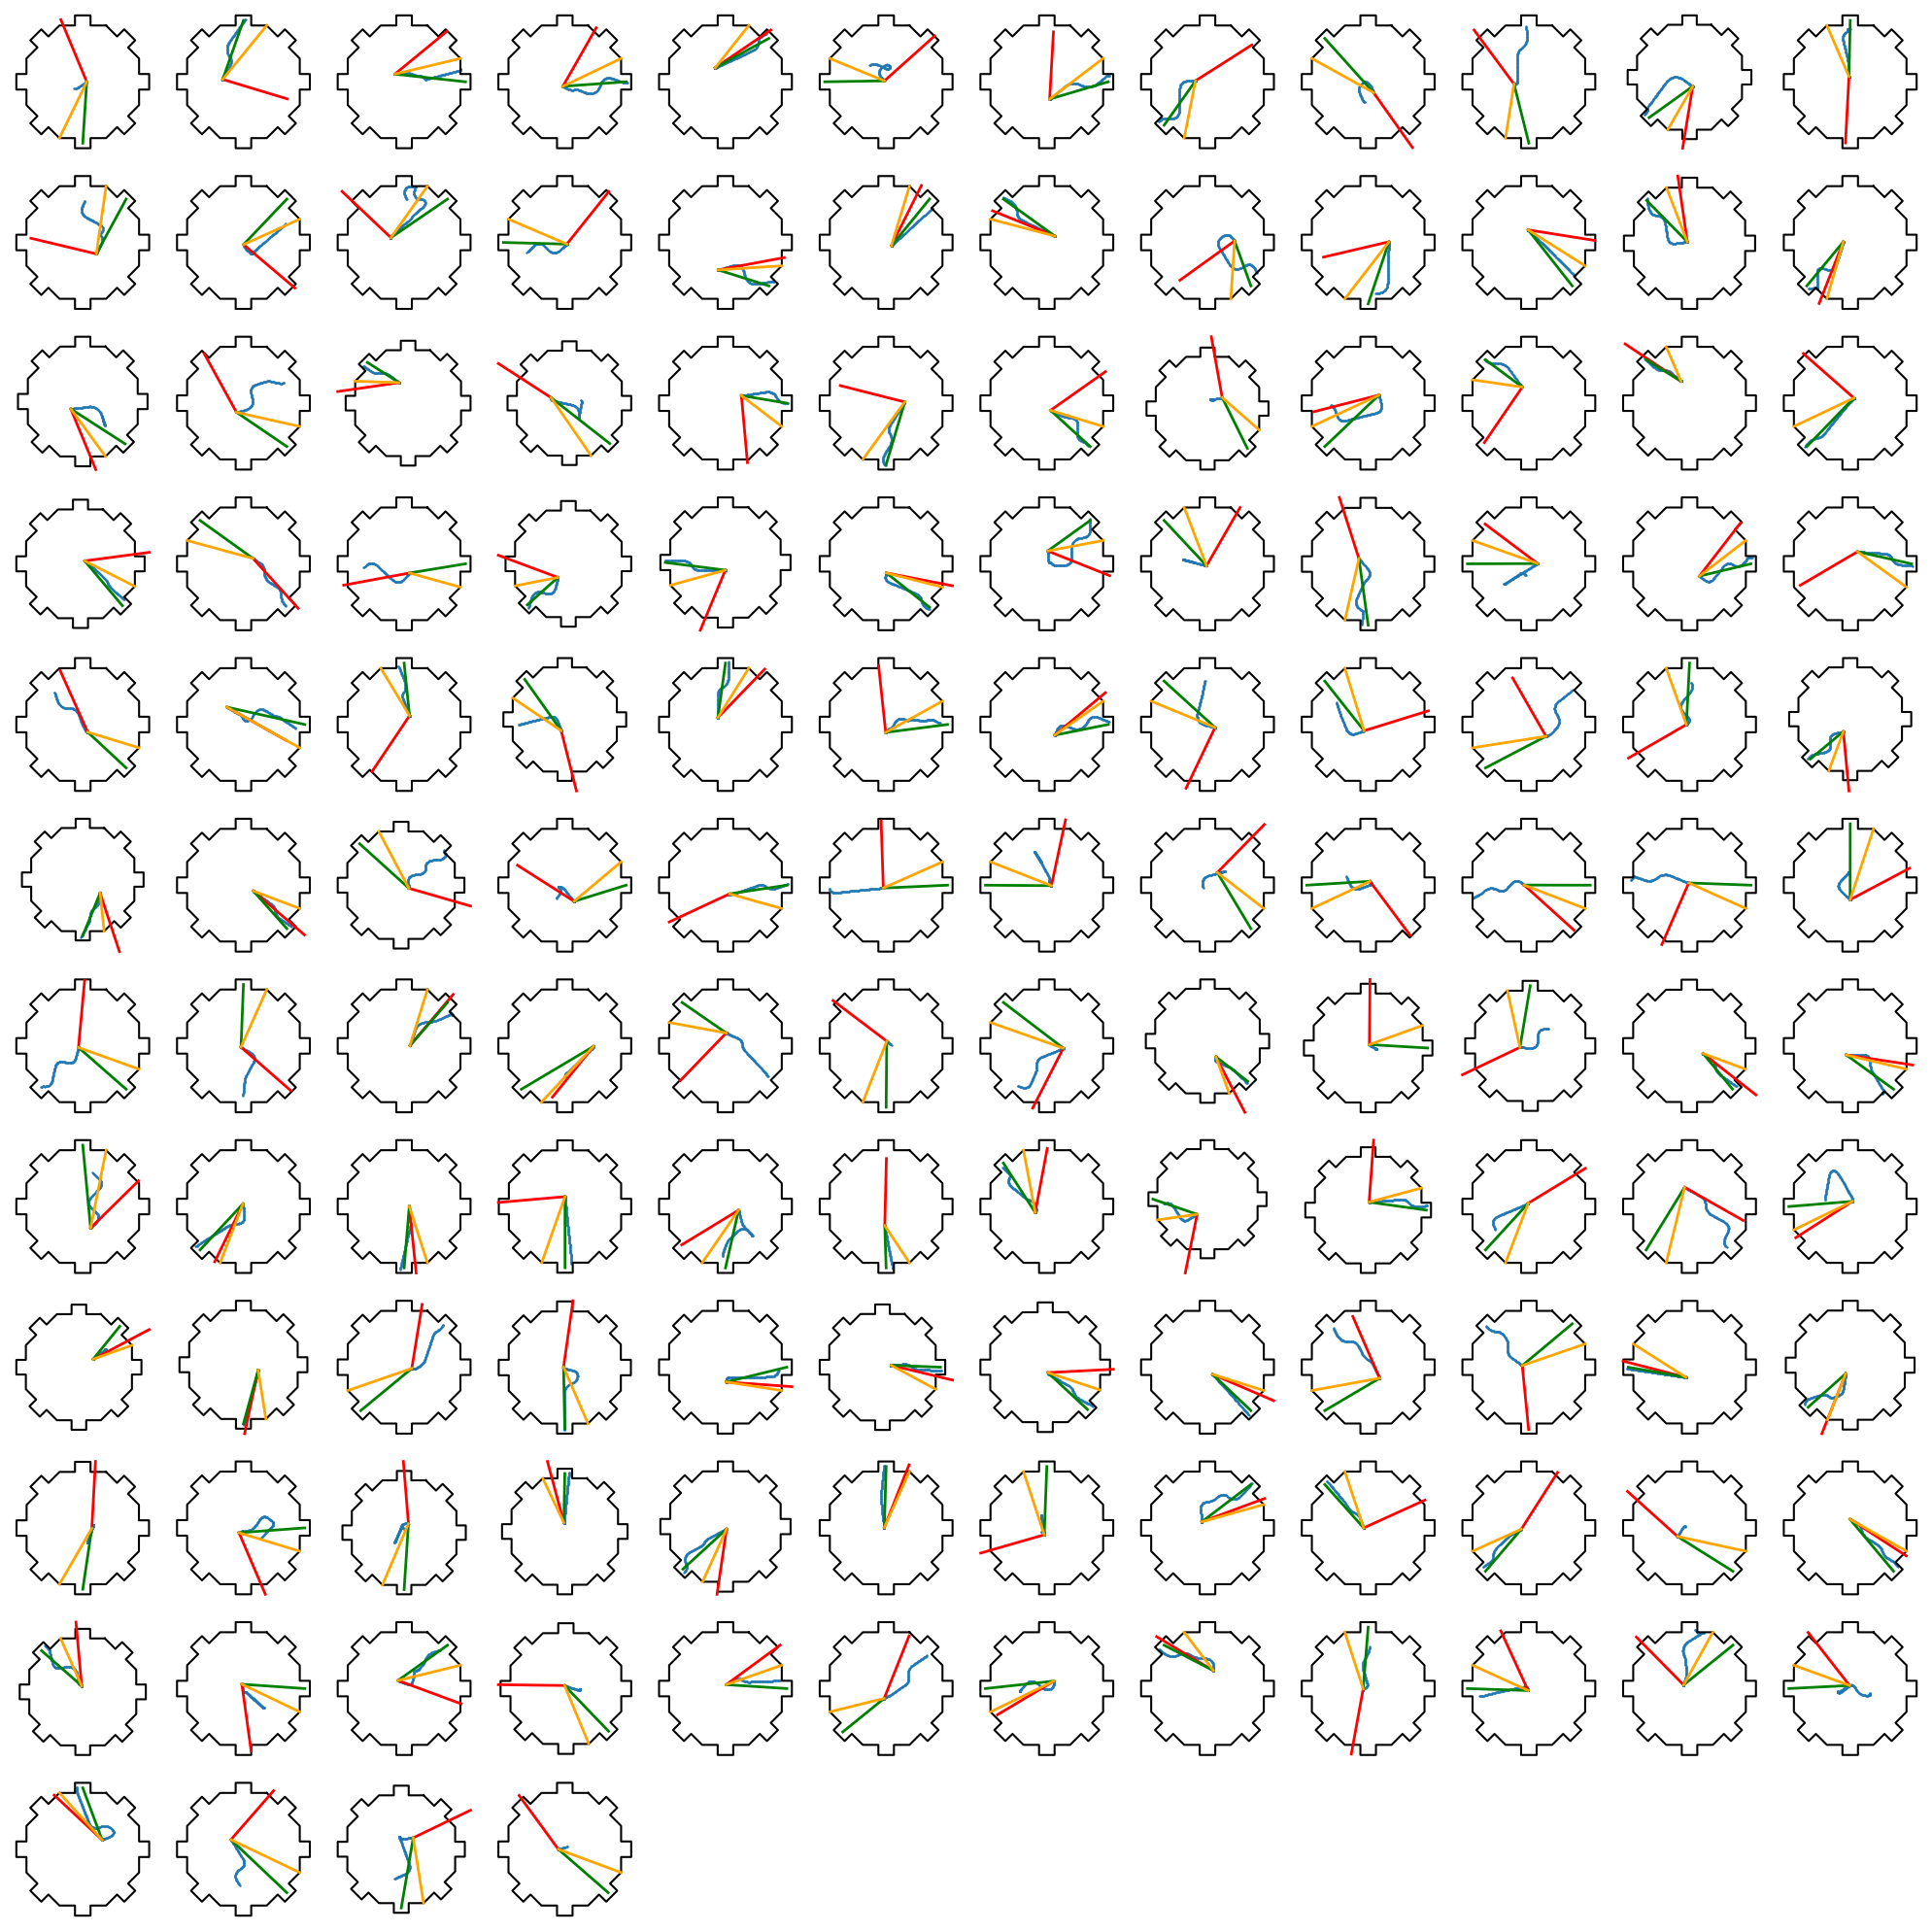

In [10]:
(thetas_closest_wall_section_session,
 thetas_trajectory_session) = wall_visibility_order_testing_functions.plot_multiple_trials_first_wall_visibility(trial_list_filtered, player_id=0)

In [11]:
print(f"condition fulfilled:\n {condition_fulfilled_session_reshaped}\n"), 
print(f"player chose given wall:\n {player_chose_given_wall_session_reshaped}\n") 
print(f"player wall choice:\n {player_wall_choice_reshaped}")

condition fulfilled:
 [[ 0.  1.  1.  1.  0.  0.  1.  1.  0.  1.  0.  0.]
 [ 1.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.]
 [ 0.  1.  1.  0.  0.  0.  1.  0.  0.  1.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  1.  0.  1.  1.  0.]
 [ 0.  0.  1.  1.  0.  1.  0.  0.  0.  0.  1.  1.]
 [ 1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  0.  0.]
 [ 1.  1.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.]
 [ 0.  0.  1.  1.  1.  0.  1.  1.  1.  0.  1.  0.]
 [ 1.  1.  1.  0.  0.  1.  0.  0.  0.  0.  1.  0.]
 [ 1.  1.  1.  1.  1.  0.  0.  1.  1.  0.  1.  0.]
 [ 0.  1.  0.  0. nan nan nan nan nan nan nan nan]]

player chose given wall:
 [[nan  1. nan  1.  1. nan  1.  1. nan nan  0. nan]
 [nan nan nan nan  0. nan  1. nan nan nan  1.  0.]
 [nan nan  1. nan  0.  1. nan nan nan  1.  1.  1.]
 [nan nan nan  0. nan  0. nan nan nan nan  1.  0.]
 [nan nan nan nan  0. nan  1. nan nan nan nan  1.]
 [ 1.  0. nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan  1

In [12]:
np.set_printoptions(suppress=True)
print(f"angle to closest wall section:\n {thetas_closest_wall_section_session}")

angle to closest wall section:
 [[131.5  67.5  26.   34.8  17.3 115.9  49.5 133.7 154.2 134.6  20.6 153.5]
 [ 84.7  64.5  81.9 105.5   6.9   9.6   7.3  50.6  39.1  23.2  12.8   5.3]
 [ 13.7 131.4  10.1 157.6  47.4  68.1  52.2 141.3  10.7  63.9  33.   66.7]
 [ 34.4 147.4 154.   31.6  51.9   3.2  32.4  50.9 149.4  17.4  14.8 113.7]
 [131.2   0.1 114.9 138.3  12.   67.2   4.9  86.9  89.9  69.1 100.3  25.7]
 [ 12.2  20.  134.  107.5 139.3  68.   80.8  83.3 101.6  21.1  89.4  43.8]
 [104.4 107.1  22.9   4.   56.4 105.7  82.3   7.7  69.7 103.   17.9   4.7]
 [ 34.2   4.8  11.9  65.6  23.9 145.   21.3  70.5  70.8 142.3  74.2   6.7]
 [  8.1  21.1 118.2 148.5   4.7  14.7  21.3   5.8  76.8 103.3  18.    0.2]
 [153.1  49.9 152.3  10.4  16.1   2.7  87.9   4.8  84.1 146.9 150.2   3.5]
 [ 18.8  56.6  34.  113.2  17.  125.7   4.9  21.8 151.7  40.9  73.6  32. ]
 [  4.7  74.4 106.7 146.5   nan   nan   nan   nan   nan   nan   nan   nan]]


In [13]:
print(f"angle to alcove:\n {thetas_trajectory_session}")

angle to alcove:
 [[153.7  87.4  45.6  56.2   5.5 139.1  70.3 157.8 173.3 157.6  45.1 178.2]
 [105.1  86.6 102.3 127.2  28.   12.8  13.6  74.3  58.3  42.8  36.2  18.2]
 [ 34.8 153.   40.7 174.9  75.4  87.7  77.6 163.8  29.2  92.1   2.1  87.2]
 [ 57.5 167.8 178.8  62.3  74.6  27.5  57.4  73.  170.1  37.1  38.9 136.9]
 [157.1  16.7 140.3 158.8  36.1  88.8  28.7 106.8 111.1  87.7 122.9  55.6]
 [ 40.3   7.7 154.  130.3 163.6  89.3 101.7 104.6 123.2  42.  111.5  62.1]
 [126.  128.9   0.8  20.3  80.7 126.6 100.3  24.8  92.9 125.   12.3  27.3]
 [ 50.9  16.9  10.7  85.   45.8 176.7  43.4  97.4  93.8 163.9  92.1  28.1]
 [ 23.1   3.3 138.7 170.7  17.8  11.3  45.9  20.1  97.  124.2   4.5  26.4]
 [174.7  71.1 171.6  16.1  39.1  19.8 108.2  16.9 107.4 172.2 170.1  17. ]
 [ 43.7  78.2  55.8 134.6  40.  150.8  24.5   3.6 174.2  63.5  95.7  54.9]
 [ 26.6  92.4 125.4 167.2   nan   nan   nan   nan   nan   nan   nan   nan]]
